<a href="https://colab.research.google.com/github/SHIBI-UMESH/twiiter-analysis/blob/main/TWITTER_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
pip install textblob 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re

In [29]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [30]:

def cleanTxt(text):

 text=re.sub(r'@[A-Za-z0-9||_]+', ' ',text)
 text=re.sub(r'#[A-Za-z0-9]+',' ',text)
 text=re.sub(r'RT[\S]+',' ',text)
 text=re.sub(r'https?:\/\/\S+',' ',text)
 text=re.sub(r'\W+',' ',text)
 
 

 return text

In [32]:

query = "(from:@katyperry) until:2022-11-09 since:2009-01-01"
tweets = []
limit = 10000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.content])
        
df1 = pd.DataFrame(tweets,columns=['@katyperry'])
print(df1)

                                             @katyperry
0     Hey, you! American! Yes, you!\nThis is your 10...
1                         #VOTE https://t.co/61c0gMIlTb
2     Vote #YesOn28 Arts and Music in Schools betwee...
3     I believe the arts open children’s minds + pro...
4     Music helped open my narrow perspective on lif...
...                                                 ...
9995  FOR SUUURE BEST DRESSED DUO RT @MDMOLINARI: ht...
9996  dunno, heard she smells... RT @JungleJulia: ht...
9997  now THAT was a fuckin show! Today was a cherry...
9998  http://twitpic.com/ez414 - made some breakfast...
9999         @joshgroban new glasses same good old hat.

[10000 rows x 1 columns]


In [33]:
df1

,@katyperry
0,"Hey, you! American! Yes, you!\nThis is your 10..."
1,#VOTE https://t.co/61c0gMIlTb
2,Vote #YesOn28 Arts and Music in Schools betwee...
3,I believe the arts open children’s minds + pro...
4,Music helped open my narrow perspective on lif...
...,...
9995,FOR SUUURE BEST DRESSED DUO RT @MDMOLINARI: ht...
9996,"dunno, heard she smells... RT @JungleJulia: ht..."
9997,now THAT was a fuckin show! Today was a cherry...
9998,http://twitpic.com/ez414 - made some breakfast...


In [34]:

#CLEANING TWEETS USING THE SNSCRAPE MNODULE
query = "(from:@katyperry) until:2020-01-01 since:2010-01-01"
tweets = []

limit = 1000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    if len(tweets) == limit:
        break
    else:
        tweet = str(tweet.content)
        tweet = cleanTxt(tweet)
        tweets.append(tweet)
        
#df = pd.DataFrame(tweets)
df = pd.DataFrame(tweets,columns=['@katyperry'])
print(df)

                                            @katyperry
0    Step into the new year with style Cheers to a ...
1    I know you had a but What Are You Doing New Ye...
2                   Uncut Gems ftw So brilliant bravo 
3                         happy holidays with the fam 
4    Day 25 of 25 Merry Christmas I hope you ve had...
..                                                 ...
995  I just caught up to Huntin Fishin Lovin and no...
996                                   OMG is that OUR 
997                                  OMG UNCLE LIONEL 
998  It s the GRAND FINALE and my last show with un...
999  Just rewatched the 3 finale contestants 1st au...

[1000 rows x 1 columns]


In [35]:
df

,@katyperry
0,Step into the new year with style Cheers to a ...
1,I know you had a but What Are You Doing New Ye...
2,Uncut Gems ftw So brilliant bravo
3,happy holidays with the fam
4,Day 25 of 25 Merry Christmas I hope you ve had...
...,...
995,I just caught up to Huntin Fishin Lovin and no...
996,OMG is that OUR
997,OMG UNCLE LIONEL
998,It s the GRAND FINALE and my last show with un...


In [36]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [37]:
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [38]:
df['Subjectivity']=df['@katyperry'].apply(getSubjectivity)
df['Polarity'] = df['@katyperry'].apply(getPolarity)

In [39]:
df

,@katyperry,Subjectivity,Polarity
0,Step into the new year with style Cheers to a ...,0.727273,0.568182
1,I know you had a but What Are You Doing New Ye...,0.454545,0.136364
2,Uncut Gems ftw So brilliant bravo,0.900000,0.200000
3,happy holidays with the fam,1.000000,0.800000
4,Day 25 of 25 Merry Christmas I hope you ve had...,0.100000,0.100000
...,...,...,...
995,I just caught up to Huntin Fishin Lovin and no...,0.000000,0.000000
996,OMG is that OUR,0.000000,0.000000
997,OMG UNCLE LIONEL,0.000000,0.000000
998,It s the GRAND FINALE and my last show with un...,0.507071,0.212121


<function matplotlib.pyplot.show(*args, **kw)>

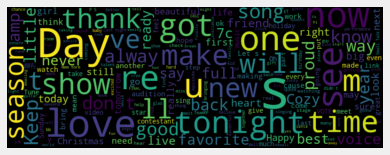

In [40]:
#plotting word cloud
allWords=' '.join( [twts for twts in df['@katyperry'] ] )
wordCloud= WordCloud(width= 800, height=300, random_state=21, max_font_size=119).generate(allWords) 

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [41]:
#create a function to compute the negative,neutral and positive analysis
def getAnalysis(score):
  if score< 0:
    return 'Negative'
  elif score==0:
     return 'Neutral'
  else:
     return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,@katyperry,Subjectivity,Polarity,Analysis
0,Step into the new year with style Cheers to a ...,0.727273,0.568182,Positive
1,I know you had a but What Are You Doing New Ye...,0.454545,0.136364,Positive
2,Uncut Gems ftw So brilliant bravo,0.900000,0.200000,Positive
3,happy holidays with the fam,1.000000,0.800000,Positive
4,Day 25 of 25 Merry Christmas I hope you ve had...,0.100000,0.100000,Positive
...,...,...,...,...
995,I just caught up to Huntin Fishin Lovin and no...,0.000000,0.000000,Neutral
996,OMG is that OUR,0.000000,0.000000,Neutral
997,OMG UNCLE LIONEL,0.000000,0.000000,Neutral
998,It s the GRAND FINALE and my last show with un...,0.507071,0.212121,Positive


In [42]:
#PRINT ALL OF THE POSITIVE TWEETS

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]== 'Positive' ):
    print(str(j) + ') '+sortedDF['@katyperry'][i])
    print()
    j = j+1

1) Step into the new year with style Cheers to a wonderful 2020 and The Frann 

2) I know you had a but What Are You Doing New Year s Eve 

3) Uncut Gems ftw So brilliant bravo 

4) happy holidays with the fam 

5) Day 25 of 25 Merry Christmas I hope you ve had fun following along Should we do another one next year 

6) Day 23 of 25 Days of Cozy What does Santa get Milk cocoa or hot toddy 

7) 2020 is already so bright not every gal gets to commemorate their trip to India with a cover of Proud to be part of the January sustainability issue 

8) Day 20 of 25 Hoof s ready for a little me time after the holiday flurry 

9) Was so happy to deliver REAL smiles and REAL snow to the beautiful and bright kids at the bgcmla of Bell Gardens The children are the future and we should never miss an opportunity to make them feel safe seen 

10) Day 19 of 25 Days of Cozy Do you know what kind of cookie you re leaving out for Santa 

11) Wrap up your holiday shopping with The Stephanie Slide on over t

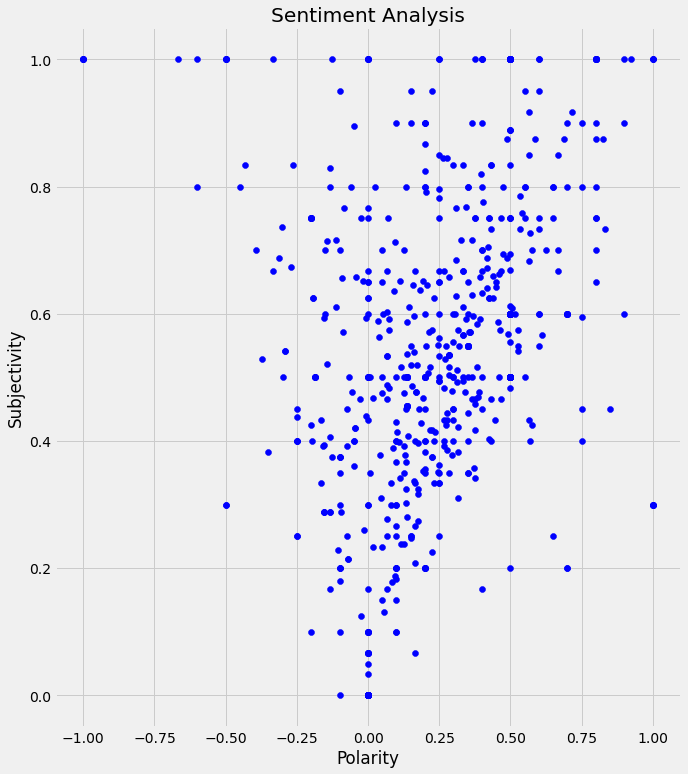

In [43]:
#plot polarity and subjectivity
plt.figure(figsize=(10,12))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()  

In [44]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['@katyperry']

round( (ptweets.shape[0] / df.shape[0]*100), 1)


49.7

In [45]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['@katyperry']

round((ntweets.shape[0] / df.shape[0]*100), 1)

11.5

In [46]:
df

,@katyperry,Subjectivity,Polarity,Analysis
0,Step into the new year with style Cheers to a ...,0.727273,0.568182,Positive
1,I know you had a but What Are You Doing New Ye...,0.454545,0.136364,Positive
2,Uncut Gems ftw So brilliant bravo,0.900000,0.200000,Positive
3,happy holidays with the fam,1.000000,0.800000,Positive
4,Day 25 of 25 Merry Christmas I hope you ve had...,0.100000,0.100000,Positive
...,...,...,...,...
995,I just caught up to Huntin Fishin Lovin and no...,0.000000,0.000000,Neutral
996,OMG is that OUR,0.000000,0.000000,Neutral
997,OMG UNCLE LIONEL,0.000000,0.000000,Neutral
998,It s the GRAND FINALE and my last show with un...,0.507071,0.212121,Positive


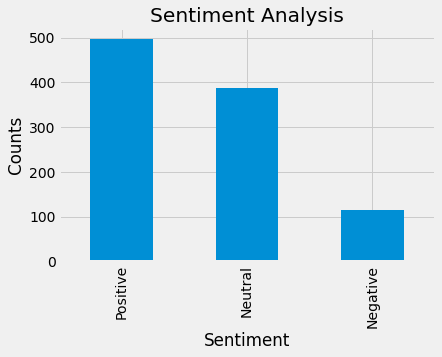

In [47]:
df['Analysis'].value_counts()


plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [48]:
df.to_csv('katyperrysentimentstweets.csv')